#Initializing project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/Gamestop Data"
# project_path = './'

gm_stock = pd.read_csv(project_path+'/Gamestop Stock Data.csv') #181 of sample
gm_vader = pd.read_csv(project_path+'/gamestop_investor_vader.csv',index_col=0) #2236 of sample
gm_vader.shape

(2236, 5)

In [3]:

gm_vader = gm_vader.dropna(subset=['Date','Text','scores'])

In [4]:
gm_vader.shape #2213

(2213, 5)

# Preparing data
In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and vader scores.

In [5]:
#In this part we are preparing data for processing (taking datetime and scores from vader data)
gm_vader_date = gm_vader['Date'].to_numpy()
gm_vader_scores = gm_vader['scores'].to_numpy()

NEG = 1
NEU = 3
POS = 5
COM = -1 #remove '}'

In [6]:
#Cleaning gm data
gm_vader_neg =[]
gm_vader_neu =[]
gm_vader_pos =[]
gm_vader_com =[] #don't know if needed
for i in range(len(gm_vader_date)):
  gm_vader_date[i] = gm_vader_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  gm_vader_date[i]=time.strptime(gm_vader_date[i],'%Y-%m-%d') 
  gm_vader_date[i]=time.strftime('%m/%d/%Y',gm_vader_date[i])

  res = gm_vader_scores[i].replace(',','').split()
  gm_vader_neg.append(float(res[NEG]))
  gm_vader_neu.append(float(res[NEU]))
  gm_vader_pos.append(float(res[POS]))
  gm_vader_com.append(float(res[COM].replace("}","")))

In [7]:
#put gm vader data in df
gm_vader_df = pd.DataFrame({
    'Date':gm_vader_date,
    'neg':gm_vader_neg,
    'neu':gm_vader_neu,
    'pos':gm_vader_pos,
    'com':gm_vader_com
})
#combine data on the same date(caculate the descriptive statistics of "neg","neu","pos","com")
#mean
gm_vader_df_mean = gm_vader_df.groupby(['Date']).agg({'neg':np.mean,'neu':np.mean,'pos':np.mean,'com':np.mean}).reset_index()
#median
gm_vader_df_median = gm_vader_df.groupby(['Date']).agg({'neg':np.median,'neu':np.median,'pos':np.median,'com':np.median}).reset_index()
#std
gm_vader_df_std = gm_vader_df.groupby(['Date']).agg({'neg':np.std,'neu':np.std,'pos':np.std,'com':np.std}).reset_index()
#max
gm_vader_df_max = gm_vader_df.groupby(['Date']).agg({'neg':np.max,'neu':np.max,'pos':np.max,'com':np.max}).reset_index()
#min
gm_vader_df_min = gm_vader_df.groupby(['Date']).agg({'neg':np.min,'neu':np.min,'pos':np.min,'com':np.min}).reset_index()
#skewness
gm_vader_df_skewness = gm_vader_df.groupby(['Date']).agg({'neg':stats.skew,'neu':stats.skew,'pos':stats.skew,'com':stats.skew}).reset_index()
#kurtosis
gm_vader_df_kurtosis = gm_vader_df.groupby(['Date']).agg({'neg':stats.kurtosis,'neu':stats.kurtosis,'pos':stats.kurtosis,'com':stats.kurtosis}).reset_index()
#Jarque-Bera
#To test if the data have normal distribution base on skewness and kurotsis

In [8]:
#clean the stock date(taking datetime and close from stock data)
gm_stock_date = gm_stock['Date'].to_numpy()
gm_stock_close = gm_stock['Close'].to_numpy()

In [9]:
#get stock date and change format
for i in range(len(gm_stock_date)):
  gm_stock_date[i] = gm_stock_date[i].split()[0]
  gm_stock_date[i]=time.strptime(gm_stock_date[i],'%m/%d/%Y')
  gm_stock_date[i]=time.strftime('%m/%d/%Y',gm_stock_date[i])

In [10]:
#put gm stock data in df
gm_stock_df = pd.DataFrame({
    'Date':gm_stock_date,
    'close':gm_stock_close
})

#normalizing the stock value
gm_stock_df['close'] = (gm_stock_df['close'] - gm_stock_df['close'].min()) / (gm_stock_df['close'].max() - gm_stock_df['close'].min())
gm_stock_df

,Date,close
0,07/01/2020,0.001717
1,07/02/2020,0.001280
2,07/06/2020,0.001135
3,07/07/2020,0.000698
4,07/08/2020,0.001193
...,...,...
176,03/15/2021,0.629372
177,03/16/2021,0.594541
178,03/17/2021,0.599313
179,03/18/2021,0.575860


In [11]:
#merge vader mean data and stock data
gm_merge_df_mean = pd.merge(gm_vader_df_mean,gm_stock_df,on='Date',how="left")
gm_merge_df_mean = gm_merge_df_mean.dropna().reset_index(drop=True)
gm_merge_df_mean.shape #Only 20 days worth of data

#median
gm_merge_df_median = pd.merge(gm_vader_df_median,gm_stock_df,on='Date',how="left")
gm_merge_df_median = gm_merge_df_median.dropna().reset_index(drop=True)

#std
gm_merge_df_std = pd.merge(gm_vader_df_std,gm_stock_df,on='Date',how="left")
gm_merge_df_std = gm_merge_df_std.dropna().reset_index(drop=True)

#max
gm_merge_df_max = pd.merge(gm_vader_df_max,gm_stock_df,on='Date',how="left")
gm_merge_df_max = gm_merge_df_max.dropna().reset_index(drop=True)

#min
gm_merge_df_min = pd.merge(gm_vader_df_min,gm_stock_df,on='Date',how="left")
gm_merge_df_min = gm_merge_df_min.dropna().reset_index(drop=True)


In [12]:
gm_merge_df_mean[['neg','neu','pos','com']][:-10].shape[0]

32

In [13]:
gm_merge_df_mean.shape

(42, 6)

# Training the linear model

Training the linear model for Gamestop (all feature)

In [14]:
#Creating a model based on the gm data
#gm_merge_df[['neg','neu','pos','com']] is the data or x or feature
#gm_merge_df[['close']] is the label
#mean
reg_gm_mean = LinearRegression().fit(gm_merge_df_mean[['neg','neu','pos','com']][:-10], gm_merge_df_mean[['close']][:-10])
#median
reg_gm_median = LinearRegression().fit(gm_merge_df_median[['neg','neu','pos','com']][:-10], gm_merge_df_median[['close']][:-10])
#std
reg_gm_std = LinearRegression().fit(gm_merge_df_std[['neg','neu','pos','com']][:-10], gm_merge_df_std[['close']][:-10])
#max
reg_gm_max = LinearRegression().fit(gm_merge_df_max[['neg','neu','pos','com']][:-10], gm_merge_df_max[['close']][:-10])
#min
reg_gm_min = LinearRegression().fit(gm_merge_df_min[['neg','neu','pos','com']][:-10], gm_merge_df_min[['close']][:-10])

# Plot the data and model of for each base line

Predict AMC model with all feature

In [15]:
#each model is predicting the label using the data that we have
#pred_gm is a numpy array consisting the values of prediction of the gm data that we use for the training
#mean 
pred_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['neg','neu','pos','com']][-10:])
#median
pred_gm_median = reg_gm_median.predict(gm_merge_df_median[['neg','neu','pos','com']][-10:])
#std
pred_gm_std = reg_gm_std.predict(gm_merge_df_std[['neg','neu','pos','com']][-10:])
#max
pred_gm_max = reg_gm_max.predict(gm_merge_df_max[['neg','neu','pos','com']][-10:])
#min
pred_gm_min = reg_gm_min.predict(gm_merge_df_min[['neg','neu','pos','com']][-10:])

#To plot the training model
#mean 
train_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['neg','neu','pos','com']][:-10])
#median
train_gm_median = reg_gm_median.predict(gm_merge_df_median[['neg','neu','pos','com']][:-10])
#std
train_gm_std = reg_gm_std.predict(gm_merge_df_std[['neg','neu','pos','com']][:-10])
#max
train_gm_max = reg_gm_max.predict(gm_merge_df_max[['neg','neu','pos','com']][:-10])
#min
train_gm_min = reg_gm_min.predict(gm_merge_df_min[['neg','neu','pos','com']][:-10])


#In this part, I am combining the data  of each company with the prediction
#mean
gm_merge_pred_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_mean,columns=['pred'])], axis=1)
#median
gm_merge_pred_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_median,columns=['pred'])], axis=1)
#std
gm_merge_pred_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_std,columns=['pred'])], axis=1)
#max
gm_merge_pred_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_max,columns=['pred'])], axis=1)
#min
gm_merge_pred_min = pd.concat([gm_merge_df_min[:-10], pd.DataFrame(train_gm_min,columns=['pred'])], axis=1)

Display the perfomance of the model

In [16]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
gm_score_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_mean)
#median
gm_score_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_median)
#std
gm_score_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_std)
#max
gm_score_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_max)
#min
gm_score_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_min)
[gm_score_mean,gm_score_median,gm_score_std,gm_score_max,gm_score_min]

[0.06176671185884983,
 0.032098475936589446,
 0.11975778705149584,
 0.00576038425829841,
 0.013843366835099518]

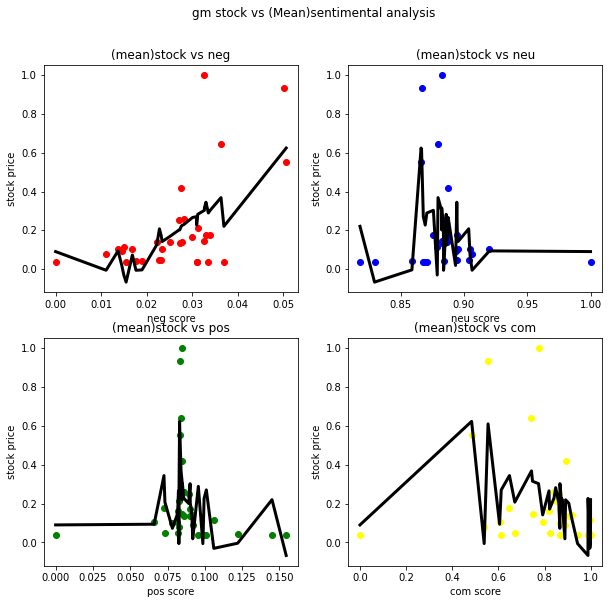

In [17]:
#plot gm
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Mean)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_mean = gm_merge_pred_mean.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(mean)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_mean = gm_merge_pred_mean.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_mean[['neu']],gm_sort_neu_mean[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_mean[['neu']], gm_sort_neu_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(mean)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred_mean.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(mean)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_mean = gm_merge_pred_mean.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_mean[['com']],gm_sort_com_mean[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_mean[['com']], gm_sort_com_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(mean)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

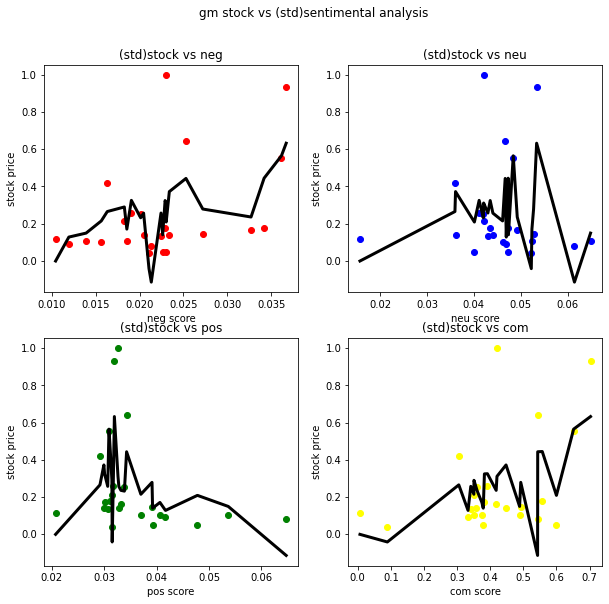

In [18]:
#std sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (std)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_std = gm_merge_pred_std.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_std[['neg']],gm_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_std[['neg']], gm_sort_neg_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(std)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_std = gm_merge_pred_std.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_std[['neu']],gm_sort_neu_std[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_std[['neu']], gm_sort_neu_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(std)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_std = gm_merge_pred_std.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_std[['pos']],gm_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_std[['pos']], gm_sort_pos_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(std)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_std = gm_merge_pred_std.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_std[['com']],gm_sort_com_std[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_std[['com']], gm_sort_com_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(std)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

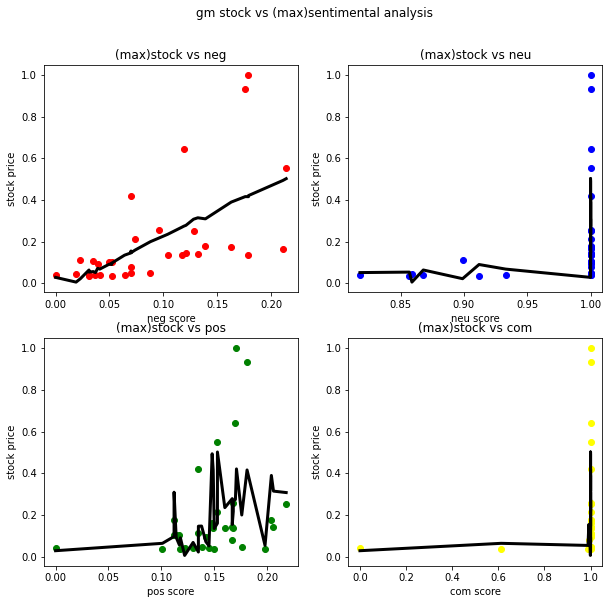

In [19]:
#Max sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (max)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_max = gm_merge_pred_max.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(max)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_max = gm_merge_pred_max.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_max[['neu']],gm_sort_neu_max[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_max[['neu']], gm_sort_neu_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(max)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred_max.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(max)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_max = gm_merge_pred_max.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_max[['com']],gm_sort_com_max[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_max[['com']], gm_sort_com_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(max)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

#Plot data against time

Plotting Gamestop stock with mean sentimental analysis

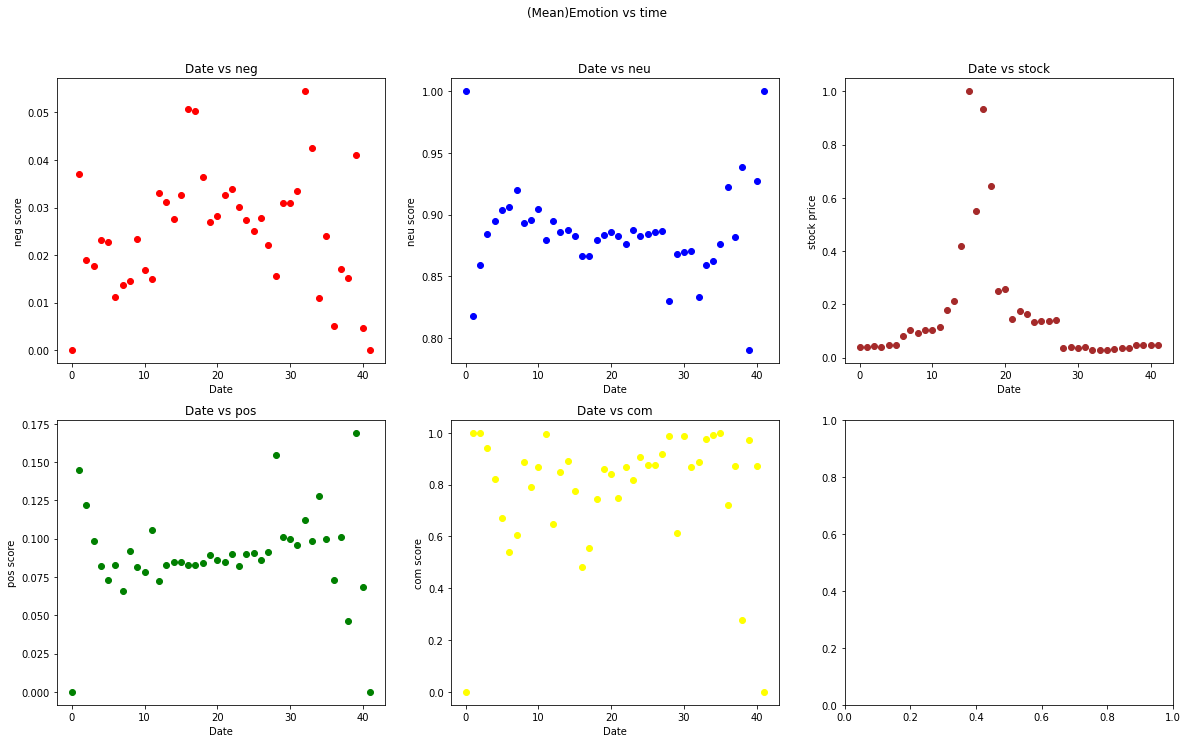

In [20]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_mean.shape[0])],gm_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_mean.shape[0])],gm_sort_neu_mean[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_mean.shape[0])],gm_sort_pos_mean[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_mean.shape[0])],gm_sort_com_mean[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

In [21]:
gm_sort_neg_mean.shape[0]

42

Plotting Gamestop stock with median sentimental analysis

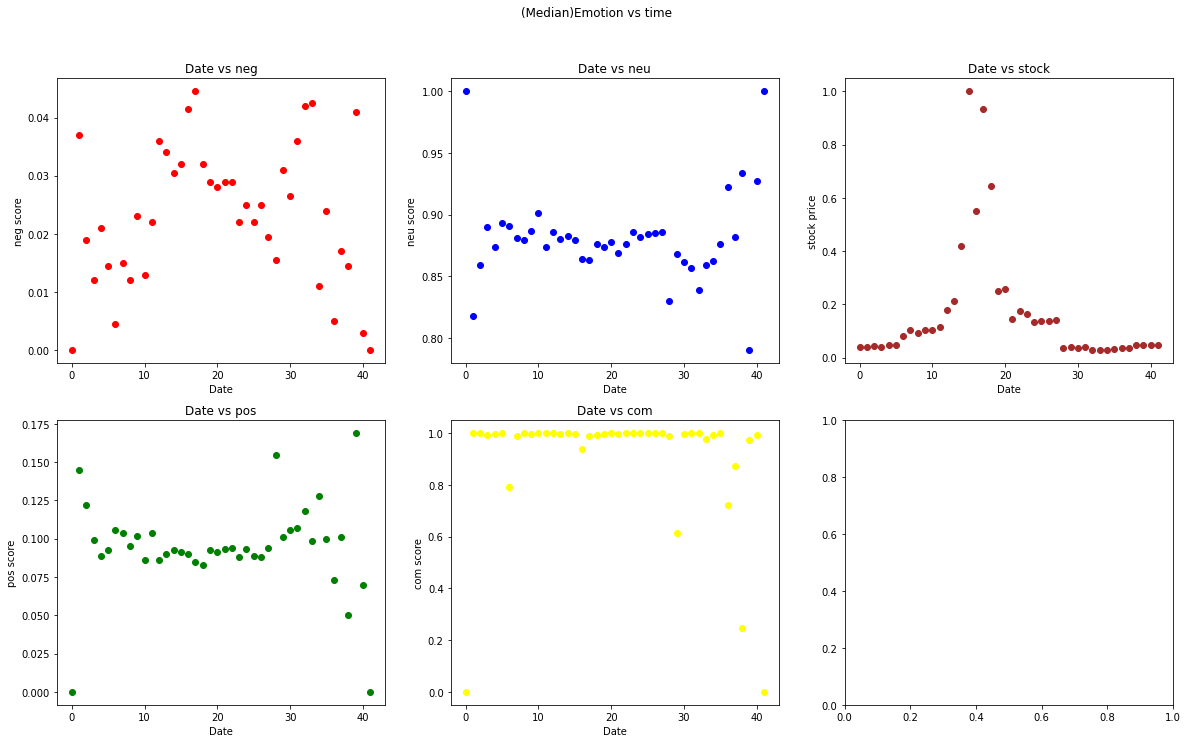

In [22]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_median.shape[0])],gm_sort_neg_median[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_median.shape[0])],gm_sort_neu_median[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_median.shape[0])],gm_sort_pos_median[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_median.shape[0])],gm_sort_com_median[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting gamestop stock with std sentimental analysis

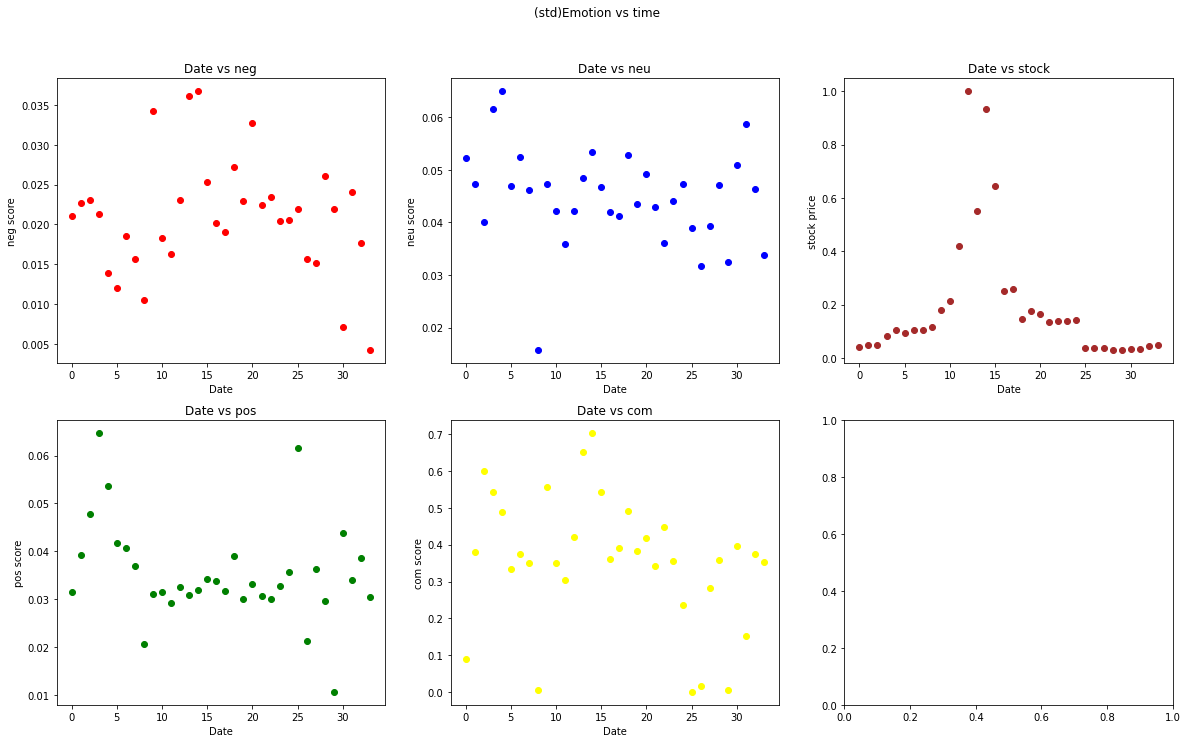

In [23]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(std)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_std.shape[0])],gm_sort_neg_std[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_std.shape[0])],gm_sort_neu_std[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_std.shape[0])],gm_sort_pos_std[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_std.shape[0])],gm_sort_com_std[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting Gamestop stock with maximum sentimental analysis

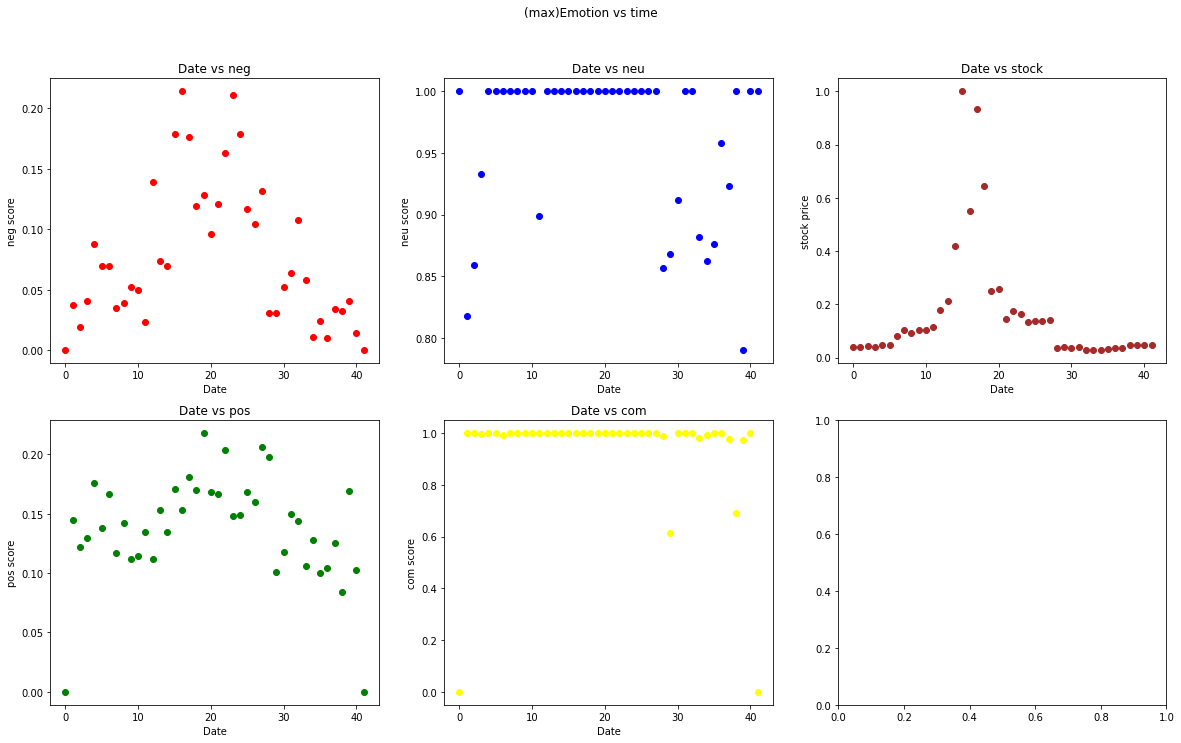

In [24]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(max)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_max.shape[0])],gm_sort_neg_max[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_max.shape[0])],gm_sort_neu_max[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_max.shape[0])],gm_sort_pos_max[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_max.shape[0])],gm_sort_com_max[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with minimum sentimental analysis

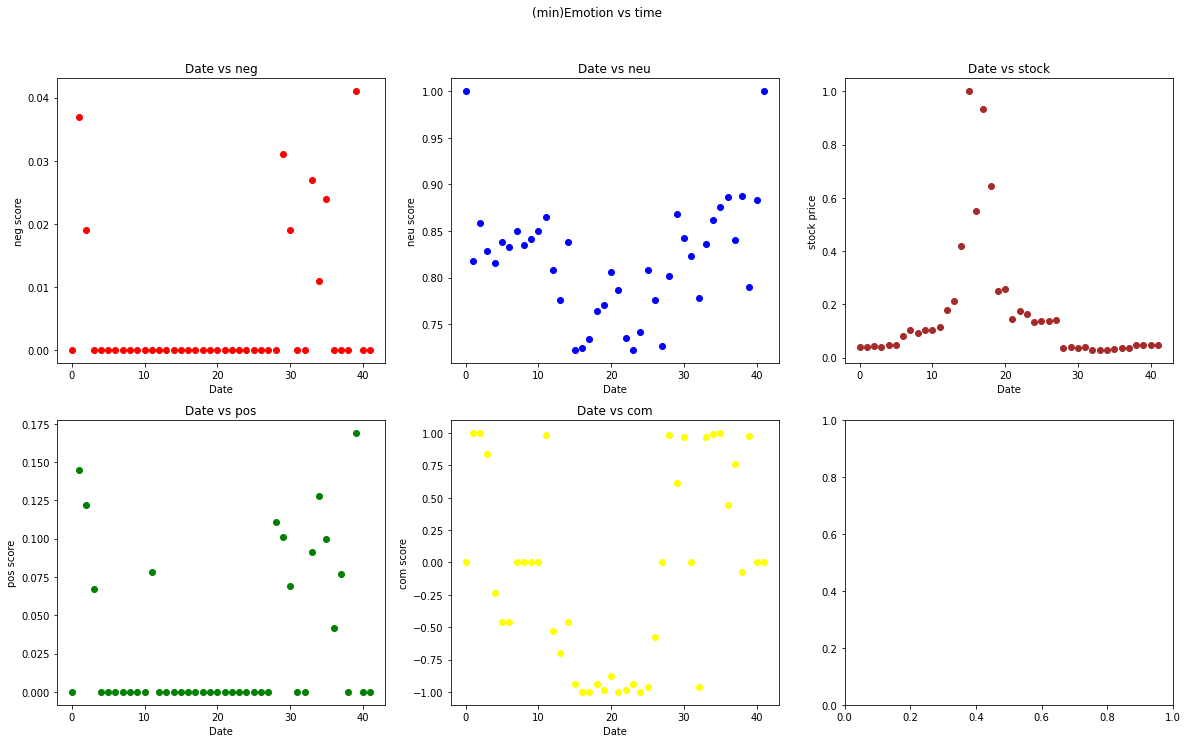

In [25]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(min)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_min.shape[0])],gm_sort_neg_min[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_min.shape[0])],gm_sort_neu_min[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_min.shape[0])],gm_sort_pos_min[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_min.shape[0])],gm_sort_com_min[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

#Training with different method

In [26]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_mean = LinearRegression().fit(gm_merge_df_mean[['neg']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_neu_mean = LinearRegression().fit(gm_merge_df_mean[['neu']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_pos_mean = LinearRegression().fit(gm_merge_df_mean[['pos']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_com_mean = LinearRegression().fit(gm_merge_df_mean[['com']][:-10], gm_merge_df_mean[['close']][:-10])

In [27]:
#predict the stock price of gm using new models
pred_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][-10:])
pred_gm_neu_mean = reg_gm_neu_mean.predict(gm_merge_df_mean[['neu']][-10:])
pred_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][-10:])
pred_gm_com_mean = reg_gm_com_mean.predict(gm_merge_df_mean[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][:-10])
train_gm_neu_mean = reg_gm_neu_mean.predict(gm_merge_df_mean[['neu']][:-10])
train_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][:-10])
train_gm_com_mean = reg_gm_com_mean.predict(gm_merge_df_mean[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_neg_mean,columns=['pred_neg'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_neu_mean,columns=['pred_neu'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_pos_mean,columns=['pred_pos'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_com_mean,columns=['pred_com'])], axis=1)

gm_merge_pred1_mean

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.000000,1.000000,0.000000,0.000000,0.038992,-0.157461,0.094328,0.310667,0.385993
1,01/05/2021,0.037000,0.818000,0.145000,0.999500,0.039341,0.348941,0.265424,0.134351,0.153555
2,01/06/2021,0.019000,0.859000,0.122000,0.999300,0.042222,0.102583,0.226881,0.162318,0.153602
3,01/08/2021,0.017667,0.884000,0.098667,0.943233,0.040272,0.084334,0.203378,0.190691,0.166640
4,01/11/2021,0.023217,0.894870,0.081870,0.821839,0.046820,0.160305,0.193160,0.211116,0.194871
5,01/12/2021,0.022833,0.903833,0.073250,0.671150,0.046849,0.155048,0.184733,0.221597,0.229914
6,01/13/2021,0.011100,0.906500,0.082600,0.538430,0.080166,-0.005541,0.182226,0.210228,0.260779
7,01/14/2021,0.013727,0.920182,0.066000,0.605291,0.104929,0.030418,0.169364,0.230413,0.245230
8,01/15/2021,0.014556,0.893444,0.091889,0.888267,0.092097,0.041754,0.194500,0.198932,0.179423
9,01/19/2021,0.023429,0.895429,0.081429,0.792014,0.103329,0.163195,0.192635,0.211652,0.201807


In [28]:
gm_score_neg_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_neg_mean)
gm_score_neu_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_neu_mean)
gm_score_pos_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_pos_mean)
gm_score_com_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_com_mean)
[gm_score_neg_mean,gm_score_neu_mean,gm_score_pos_mean,gm_score_com_mean]

[0.0692162522498424,
 0.029233732387426114,
 0.029697346043967156,
 0.035025659563117074]

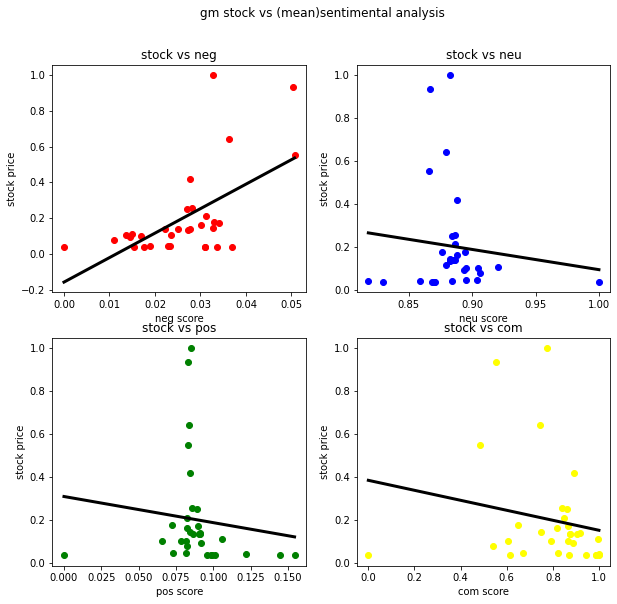

In [29]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (mean)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_mean = gm_merge_pred1_mean.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_mean = gm_merge_pred1_mean.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_mean[['neu']],gm_sort_neu_mean[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_mean[['neu']], gm_sort_neu_mean[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred1_mean.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_mean = gm_merge_pred1_mean.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_mean[['com']],gm_sort_com_mean[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_mean[['com']], gm_sort_com_mean[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with median sentimental analysis

In [30]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_median = LinearRegression().fit(gm_merge_df_median[['neg']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_neu_median = LinearRegression().fit(gm_merge_df_median[['neu']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_pos_median = LinearRegression().fit(gm_merge_df_median[['pos']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_com_median = LinearRegression().fit(gm_merge_df_median[['com']][:-10], gm_merge_df_median[['close']][:-10])

#predict the stock price of gm using new models
pred_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][-10:])
pred_gm_neu_median = reg_gm_neu_median.predict(gm_merge_df_median[['neu']][-10:])
pred_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][-10:])
pred_gm_com_median = reg_gm_com_median.predict(gm_merge_df_median[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][:-10])
train_gm_neu_median = reg_gm_neu_median.predict(gm_merge_df_median[['neu']][:-10])
train_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][:-10])
train_gm_com_median = reg_gm_com_median.predict(gm_merge_df_median[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_neg_median,columns=['pred_neg'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_neu_median,columns=['pred_neu'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_pos_median,columns=['pred_pos'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_com_median,columns=['pred_com'])], axis=1)

gm_merge_pred1_median

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.0000,1.0000,0.0000,0.00000,0.038992,-0.117719,0.119628,0.374164,0.012567
1,01/05/2021,0.0370,0.8180,0.1450,0.99950,0.039341,0.367888,0.243949,0.113335,0.213525
2,01/06/2021,0.0190,0.8590,0.1220,0.99930,0.042222,0.131647,0.215943,0.154708,0.213485
3,01/08/2021,0.0120,0.8900,0.0990,0.99210,0.040272,0.039775,0.194767,0.196081,0.212038
4,01/11/2021,0.0210,0.8740,0.0890,0.99470,0.046820,0.157896,0.205696,0.214069,0.212560
5,01/12/2021,0.0145,0.8935,0.0925,0.99850,0.046849,0.072587,0.192376,0.207773,0.213324
6,01/13/2021,0.0045,0.8905,0.1055,0.79240,0.080166,-0.058658,0.194426,0.184388,0.171886
7,01/14/2021,0.0150,0.8810,0.1040,0.98840,0.104929,0.079149,0.200915,0.187086,0.211294
8,01/15/2021,0.0120,0.8790,0.0950,0.99960,0.092097,0.039775,0.202281,0.203276,0.213545
9,01/19/2021,0.0230,0.8870,0.1020,0.99650,0.103329,0.184145,0.196816,0.190684,0.212922


In [31]:
gm_score_neg_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_neg_median)
gm_score_neu_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_neu_median)
gm_score_pos_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_pos_median)
gm_score_com_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_com_median)
[gm_score_neg_median,gm_score_neu_median,gm_score_pos_median,gm_score_com_median]

[0.055342461591698436,
 0.026710616757038043,
 0.03602644084270993,
 0.022604906240779224]

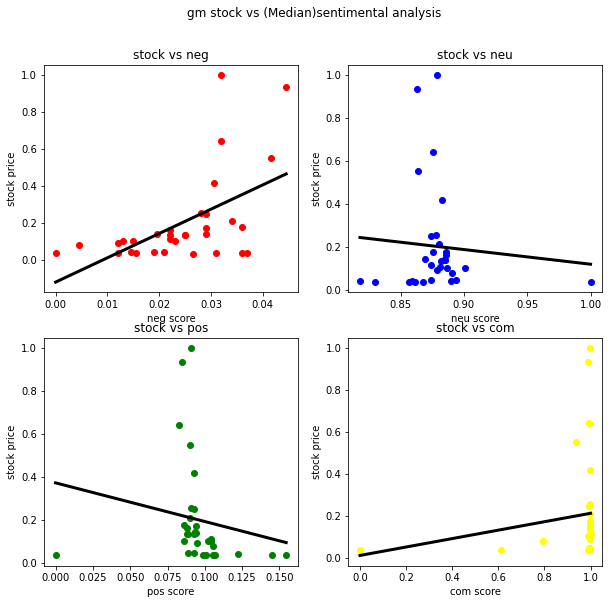

In [32]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Median)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_median = gm_merge_pred1_median.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_median[['neg']],gm_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_median[['neg']], gm_sort_neg_median[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_median = gm_merge_pred1_median.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_median[['neu']],gm_sort_neu_median[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_median[['neu']], gm_sort_neu_median[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_median = gm_merge_pred1_median.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_median[['pos']],gm_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_median[['pos']], gm_sort_pos_median[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_median = gm_merge_pred1_median.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_median[['com']],gm_sort_com_median[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_median[['com']], gm_sort_com_median[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with std sentimental analysis

In [33]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_std = LinearRegression().fit(gm_merge_df_std[['neg']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_neu_std = LinearRegression().fit(gm_merge_df_std[['neu']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_pos_std = LinearRegression().fit(gm_merge_df_std[['pos']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_com_std = LinearRegression().fit(gm_merge_df_std[['com']][:-10], gm_merge_df_std[['close']][:-10])

In [34]:
#predict the stock price of gm using new models
pred_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][-10:])
pred_gm_neu_std = reg_gm_neu_std.predict(gm_merge_df_std[['neu']][-10:])
pred_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][-10:])
pred_gm_com_std = reg_gm_com_std.predict(gm_merge_df_std[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][:-10])
train_gm_neu_std = reg_gm_neu_std.predict(gm_merge_df_std[['neu']][:-10])
train_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][:-10])
train_gm_com_std = reg_gm_com_std.predict(gm_merge_df_std[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_neg_std,columns=['pred_neg'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_neu_std,columns=['pred_neu'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_pos_std,columns=['pred_pos'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_com_std,columns=['pred_com'])], axis=1)

gm_merge_pred1_std

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/08/2021,0.021079,0.052259,0.031501,0.089533,0.040272,0.231599,0.251651,0.288007,0.025222
1,01/11/2021,0.022635,0.047378,0.039215,0.379012,0.046820,0.257398,0.252641,0.225379,0.229677
2,01/12/2021,0.023037,0.040118,0.047774,0.599923,0.046849,0.264054,0.254115,0.155892,0.385704
3,01/13/2021,0.021341,0.061468,0.064719,0.543067,0.080166,0.235937,0.249781,0.018328,0.345548
4,01/14/2021,0.013915,0.064901,0.053662,0.488707,0.104929,0.112822,0.249084,0.108093,0.307154
5,01/15/2021,0.011949,0.046918,0.041679,0.333101,0.092097,0.080233,0.252735,0.205381,0.197251
6,01/19/2021,0.018555,0.052392,0.040616,0.374862,0.103329,0.189750,0.251624,0.214012,0.226747
7,01/20/2021,0.015643,0.046135,0.036978,0.350718,0.102631,0.141471,0.252894,0.243545,0.209694
8,01/21/2021,0.010440,0.015700,0.020700,0.006842,0.114008,0.055222,0.259072,0.375697,-0.033181
9,01/22/2021,0.034191,0.047321,0.031149,0.557126,0.177967,0.448966,0.252653,0.290868,0.355477


In [35]:
gm_score_neg_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_neg_std)
gm_score_neu_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_neu_std)
gm_score_pos_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_pos_std)
gm_score_com_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_com_std)
[gm_score_neg_std,gm_score_neu_std,gm_score_pos_std,gm_score_com_std]

[0.02867017297635458,
 0.04362137847957168,
 0.06023365193090944,
 0.01671945342953703]

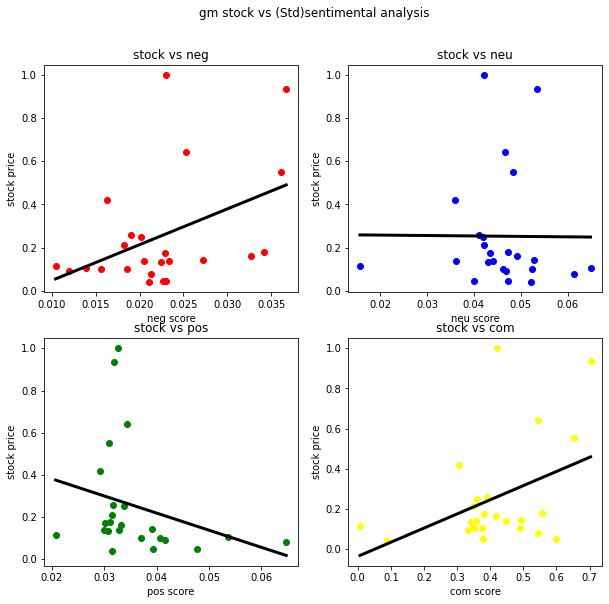

In [36]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Std)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_std = gm_merge_pred1_std.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_std[['neg']],gm_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_std[['neg']], gm_sort_neg_std[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_std = gm_merge_pred1_std.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_std[['neu']],gm_sort_neu_std[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_std[['neu']], gm_sort_neu_std[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_std = gm_merge_pred1_std.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_std[['pos']],gm_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_std[['pos']], gm_sort_pos_std[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_std = gm_merge_pred1_std.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_std[['com']],gm_sort_com_std[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_std[['com']], gm_sort_com_std[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with maximum sentimental analysis

In [37]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_max = LinearRegression().fit(gm_merge_df_max[['neg']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_neu_max = LinearRegression().fit(gm_merge_df_max[['neu']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_pos_max = LinearRegression().fit(gm_merge_df_max[['pos']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_com_max = LinearRegression().fit(gm_merge_df_max[['com']][:-10], gm_merge_df_max[['close']][:-10])

In [38]:
#predict the stock price of gm using new models
pred_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][-10:])
pred_gm_neu_max = reg_gm_neu_max.predict(gm_merge_df_max[['neu']][-10:])
pred_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][-10:])
pred_gm_com_max = reg_gm_com_max.predict(gm_merge_df_max[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][:-10])
train_gm_neu_max = reg_gm_neu_max.predict(gm_merge_df_max[['neu']][:-10])
train_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][:-10])
train_gm_com_max = reg_gm_com_max.predict(gm_merge_df_max[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_neg_max,columns=['pred_neg'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_neu_max,columns=['pred_neu'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_pos_max,columns=['pred_pos'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_com_max,columns=['pred_com'])], axis=1)

gm_merge_pred1_max

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.000,1.000,0.000,0.0000,0.038992,-0.023883,0.241572,-0.067084,-0.000142
1,01/05/2021,0.037,0.818,0.145,0.9995,0.039341,0.067826,-0.024196,0.197582,0.211842
2,01/06/2021,0.019,0.859,0.122,0.9993,0.042222,0.023211,0.035675,0.155600,0.211800
3,01/08/2021,0.041,0.933,0.130,0.9977,0.040272,0.077740,0.143734,0.170202,0.211461
4,01/11/2021,0.088,1.000,0.176,1.0000,0.046820,0.194236,0.241572,0.254165,0.211948
5,01/12/2021,0.070,1.000,0.138,1.0000,0.046849,0.149621,0.241572,0.184805,0.211948
6,01/13/2021,0.070,1.000,0.167,0.9926,0.080166,0.149621,0.241572,0.237738,0.210379
7,01/14/2021,0.035,1.000,0.117,0.9999,0.104929,0.062869,0.241572,0.146474,0.211927
8,01/15/2021,0.039,1.000,0.142,1.0000,0.092097,0.072783,0.241572,0.192106,0.211948
9,01/19/2021,0.052,1.000,0.112,0.9999,0.103329,0.105005,0.241572,0.137347,0.211927


In [39]:
gm_score_neg_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_neg_max)
gm_score_neu_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_neu_max)
gm_score_pos_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_pos_max)
gm_score_com_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_com_max)
[gm_score_neg_max,gm_score_neu_max,gm_score_pos_max,gm_score_com_max]

[0.006390206167354806,
 0.020592775928294286,
 0.014437027166901645,
 0.025673175251782875]

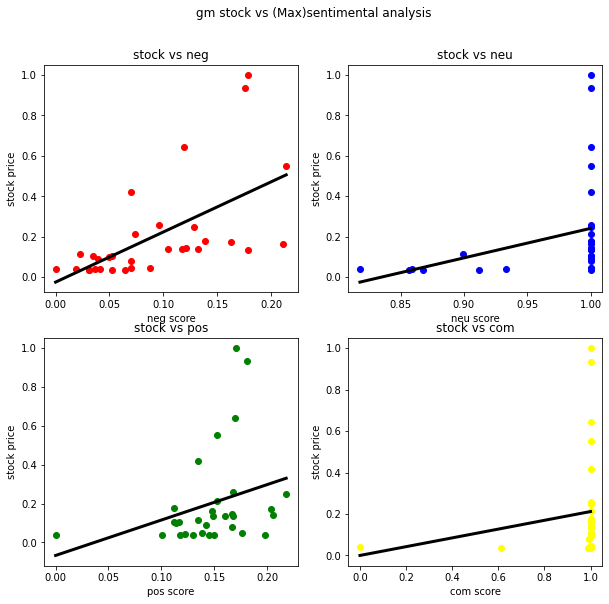

In [40]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Max)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_max = gm_merge_pred1_max.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_max = gm_merge_pred1_max.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_max[['neu']],gm_sort_neu_max[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_max[['neu']], gm_sort_neu_max[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred1_max.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_max = gm_merge_pred1_max.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_max[['com']],gm_sort_com_max[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_max[['com']], gm_sort_com_max[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with minimum sentimental analysis

In [41]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_min = LinearRegression().fit(gm_merge_df_min[['neg']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_neu_min = LinearRegression().fit(gm_merge_df_min[['neu']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_pos_min = LinearRegression().fit(gm_merge_df_min[['pos']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_com_min = LinearRegression().fit(gm_merge_df_min[['com']][:-10], gm_merge_df_min[['close']][:-10])

#predict the stock price of gm using new models
pred_gm_neg_min = reg_gm_neg_min.predict(gm_merge_df_min[['neg']][-10:])
pred_gm_neu_min = reg_gm_neu_min.predict(gm_merge_df_min[['neu']][-10:])
pred_gm_pos_min = reg_gm_pos_min.predict(gm_merge_df_min[['pos']][-10:])
pred_gm_com_min = reg_gm_com_min.predict(gm_merge_df_min[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_min = reg_gm_neg_min.predict(gm_merge_df_min[['neg']][:-10])
train_gm_neu_min = reg_gm_neu_min.predict(gm_merge_df_min[['neu']][:-10])
train_gm_pos_min = reg_gm_pos_min.predict(gm_merge_df_min[['pos']][:-10])
train_gm_com_min = reg_gm_com_min.predict(gm_merge_df_min[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_min = pd.concat([gm_merge_df_min[:-10], pd.DataFrame(train_gm_neg_min,columns=['pred_neg'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_neu_min,columns=['pred_neu'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_pos_min,columns=['pred_pos'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_com_min,columns=['pred_com'])], axis=1)

gm_merge_pred1_min

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.000,1.000,0.000,0.0000,0.038992,0.223880,-0.235762,0.242222,0.159055
1,01/05/2021,0.037,0.818,0.145,0.9995,0.039341,-0.013797,0.176549,-0.023063,-0.023431
2,01/06/2021,0.019,0.859,0.122,0.9993,0.042222,0.101829,0.083665,0.019017,-0.023394
3,01/08/2021,0.000,0.829,0.067,0.8399,0.040272,0.223880,0.151629,0.119642,0.005708
4,01/11/2021,0.000,0.816,0.000,-0.2330,0.046820,0.223880,0.181079,0.242222,0.201596
5,01/12/2021,0.000,0.838,0.000,-0.4588,0.046849,0.223880,0.131240,0.242222,0.242822
6,01/13/2021,0.000,0.833,0.000,-0.4588,0.080166,0.223880,0.142567,0.242222,0.242822
7,01/14/2021,0.000,0.850,0.000,0.0000,0.104929,0.223880,0.104054,0.242222,0.159055
8,01/15/2021,0.000,0.835,0.000,0.0000,0.092097,0.223880,0.138036,0.242222,0.159055
9,01/19/2021,0.000,0.841,0.000,0.0000,0.103329,0.223880,0.124443,0.242222,0.159055


In [42]:
gm_score_neg_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_neg_min)
gm_score_neu_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_neu_min)
gm_score_pos_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_pos_min)
gm_score_com_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_com_min)
[gm_score_neg_min,gm_score_neu_min,gm_score_pos_min,gm_score_com_min]

[0.023049095681084993,
 0.01961202847103343,
 0.01994761383780725,
 0.014994011478154604]

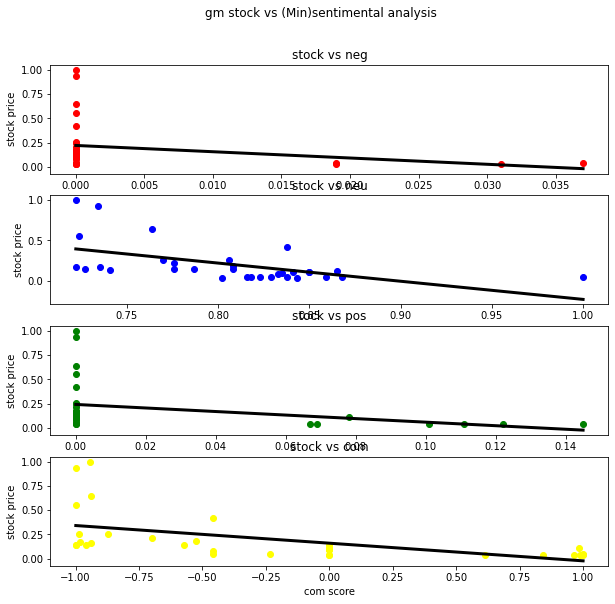

In [43]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(4)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Min)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_min = gm_merge_pred1_min.sort_values(by=['neg'])
axs[0].scatter(gm_sort_neg_min[['neg']],gm_sort_neg_min[['close']],color='red',label='neg') #Plotting the data
axs[0].plot(gm_sort_neg_min[['neg']], gm_sort_neg_min[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0].set_title('stock vs neg')
axs[0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_min = gm_merge_pred1_min.sort_values(by=['neu'])
axs[1].scatter(gm_sort_neu_min[['neu']],gm_sort_neu_min[['close']],color='blue',label='neu') #Plotting the data
axs[1].plot(gm_sort_neu_min[['neu']], gm_sort_neu_min[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1].set_title('stock vs neu')
axs[1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_min = gm_merge_pred1_min.sort_values(by=['pos'])
axs[2].scatter(gm_sort_pos_min[['pos']],gm_sort_pos_min[['close']],color='green',label='pos')#Plotting the data
axs[2].plot(gm_sort_pos_min[['pos']], gm_sort_pos_min[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[2].set_title('stock vs pos')
axs[2].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_min = gm_merge_pred1_min.sort_values(by=['com'])
axs[3].scatter(gm_sort_com_min[['com']],gm_sort_com_min[['close']],color='yellow',label='com')#Plotting the data
axs[3].plot(gm_sort_com_min[['com']], gm_sort_com_min[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[3].set_title('stock vs com')
axs[3].set(xlabel='com score', ylabel='stock price')
plt.show()